<a id="1"></a> <br>
# Introduction

This lesson is a continuation of the series on studying reinforcement learning in a series of game simulations, in the [previous lesson](https://www.kaggle.com/andrej0marinchenko/000-intro-kaggle-environment) we got acquainted with the Kaggle virtual environment and the simplest agents, and also created an agent that received a final not bad score of 550 - 790 points. In this tutorial we will look at this agent in detail, I will explain to you only what you need to understand how it works, no more, no less. In my [repository on github](https://github.com/BEPb/Kaggle_step_by_step_ConnectX) you can download and get acquainted with the step-by-step description and development of solutions for this competition.

I have prepared a whole course of training material for this competition and I will be glad to share with you:
1. [000.intro Kaggle Environment](https://www.kaggle.com/andrej0marinchenko/000-intro-kaggle-environment)
1. [001. Getting Started ConnectX](https://www.kaggle.com/andrej0marinchenko/001-getting-started-connectx)
    1. [00.simple_agent_random](https://www.kaggle.com/andrej0marinchenko/00-simple-agent-random)
    1. [01.simple_agent_negamax](https://www.kaggle.com/andrej0marinchenko/01-simple-agent-negamax)
    1. [02.initial_agent](https://www.kaggle.com/andrej0marinchenko/02-initial-agent)
    1. [03.one_step_lookahead_agent](https://www.kaggle.com/andrej0marinchenko/03-one-step-lookahead-agent)
    1. [04.Nstep_lookahead_agent](https://www.kaggle.com/andrej0marinchenko/04-nstep-lookahead-agent)
    1. [05.Fast Nstep lookahead agent](https://www.kaggle.com/andrej0marinchenko/05-fast-nstep-lookahead-agent)
1. [002. Q-Learning step-by-step instruction](https://www.kaggle.com/andrej0marinchenko/002-q-learning-step-by-step-instruction)
    1. [06.play_with_me](https://www.kaggle.com/andrej0marinchenko/06-play-with-me)
    1. [07.try_to_win_my_agent](https://www.kaggle.com/andrej0marinchenko/07-try-to-win-my-agent)



**Content:**
1. [Introduction:](#1)
    1. [Hello Kagglers](#2)
    1. [Importing Dependencies, and creating a game environment](#3)
1. [Base Agents](#4)
    1. [Random agent](#5)
    1. [Negamax agent](#6)
1. [Creating your first agents](#7)
    1. [Initial Agents](#8)
    1. [1-step lookahead agent](#9)
    1. [Nstep lookahead agent](#10)
    1. [Fast Nstep lookahead agent](#11)
1. [Creating Submission file](#12)
1. [Validating submission file](#13)
1. [Let's summarize our tutorial](#14)



<a id="2"></a> <br>
### Hello Kagglers
This post was written by me after taking the lead in this type of competition. I went through many training courses, but it was the topic of simulations that I liked the most and I decided to share my knowledge for those who want to figure out what it is.
Connect Four is a game where two players take turns dropping colored discs into a vertical grid. Each
 the player uses their color (usually red or yellow) and the object of the game is to be the first to get four discs in a row (by
vertical, horizontal or diagonal).

# Importing Dependencies and creating a game environment

In [ ]:
!pip install kaggle-environments -U
'''
Python 3.9 Reinforcement Learning Python Starter Program - Reinforcement Learning
Filename `001. Getting Started ConnectX.ipynb`

Version: 0.1
Author: Andrey Marinchenko
Date: 2022-02-10

let's use one of the kaggle_environments test games, in particular, with the "ConnectX" environment
'''
from kaggle_environments import make, evaluate, utils, agent  # connect the library kaggle_environments simulation virtual environment and its functions
'''
make - create an environment written in file `core.py`
evaluate - the function of evaluating and returning a reward for one or more episodes is written in the file `core.py`
utils - description of the functions of the utilities used in the environment written in file `utils.py`
agent - agent classes (local and web agent) are described in file `agent.py`
'''

# additional libraries, we will need them in this notebook
import random  # connect the library to generate random numbers, letters, random selection of sequence elements
import numpy as np  # connect the library general mathematical and numerical operations
import os  # connect the library operating system
import inspect  # connect the library provides several useful functions to help get information about live objects such as modules, classes, methods, functions, tracebacks
import time  # connect the library time
from datetime import datetime  # connect the library data

#measure notebook running time
start_time = time.time()

If you see the error message "Failed: football: No module named 'gfootball'" we are advised not to pay attention to this, this error certainly does not make any sense regarding our ConnectX environment and within the framework of this simulation, it will not interfere with us. For the sake of fairness, I want to note the fact that despite  [complaints about the bug](https://www.kaggle.com/c/connectx/discussion/124392), this is not the first time, no significant measures have been taken to eliminate it. Somewhere inside, a perfectionist yells about the imperfection of this system.

In [ ]:
'''let's create a virtual simulation and check if it works without starting the game and what is the state of the playing field'''
env = make("connectx")  # create a virtual simulation "connectx"
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

great, we have created a virtual environment and see that it is on hold until our players start playing in it.

<a id="4"></a> <br>
# Base Agents
Base agents are those agents that are already programmed in the default virtual environment. Base agents are those agents that are already programmed in the default virtual environment. From the previous lesson, we know that there are two agents for this connectx virtual environment: "random" and "negamax"

<a id="5"></a> <br>
# Random agent

In [ ]:
env = make("connectx")  
'''
In the following example, we first count the default agents and then list them'''
agent_random = "random" # Load a default agent called "random".
agent_negamax = "negamax" # Load a default agent called "random".


agents = [agent_random, agent_negamax]  # here we will create a list of our agents
env.run(agents)  # specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

Base agents are those agents that are already programmed in the default virtual environment. From the previous lesson, we already know and understand why the negamax agent plays better than a random agent. Can we try to write these agents to a file in the same form and send them to participate in the competition? Example:

```python
%%writefile agent_random.py
agent = "random"
```

Such code will not work, because when loading, we will get just a line of text, and not the agent itself. But there is an alternative, write your agent, and also add a preliminary check whether this cell is free or not before making a move.

In [ ]:
%%writefile agent_random.py
# This agent random chooses a non-empty column.
'''we set the name of our agent function, which takes two parameters as input (the state of the playing field and the setting of the game environment)'''
def my_agent(observation, configuration):
    from random import choice  # connect the library for working with random numbers
    
    '''in next line we generate a random number and check each column in the playing field, if the value is early zero, 
    this means that no player has placed his chip in this cell, therefore our agent can throw his chip into this cell'''
    return choice([c for c in range(configuration.columns) if observation.board[c] == 0])    

In [ ]:
'''let's look at the result - our final agent'''
with open("agent_random.py","r") as f:
    print(f.read())

In [ ]:
'''and now we will force a random agent to play with the agent read from the file'''
env = make("connectx")

# Load an agent from a file.
agent = "agent_random.py"

agents = [agent, agent]  # here we will create a list of our agents
env.run(agents)  # specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

Great, now we see that everything is working and we can even send this code to participate in the competition and it will fight with the agents of other members of the Kaggle community. Of course, it is not necessary to hope that this agent will receive a lot of points, but for verification, you can do it especially for you, I have prepared an example of this code in a [separate notebook](https://www.kaggle.com/andrej0marinchenko/00-simple-agent-random). Or immediately send the code of the python file from the [github](https://github.com/BEPb/Kaggle_step_by_step_ConnectX/tree/master/02.step_02) repository.

In [ ]:
'''We can also see what is written in an arbitrary agent of the gaming environment by default using the following line of code'''
print(inspect.getsource(env.agents['random']))

as we see the code in the virtual environment is almost no different from what we wrote in our agent, the only difference is that instead of our agent's zero, the EMPTY condition is set.

<a id="6"></a> <br>
# Negamax agent

In [ ]:
%%writefile agent_negamax.py


'''function of determining the occupation of positions by balls on the playing field'''
def play(board, column, mark, config):    
    EMPTY = 0  # this variable means that the given cell of the playing field is empty
    columns = config.columns  # from the configuration we read data on the number of columns in the playing field
    rows = config.rows  # from the configuration we read data on the number of rows in the playing field
    row = max([r for r in range(rows) if board[column + (r * columns)] == EMPTY])  # perebiruem each cell of the playing field, check whether it is free or not
    
    '''Next line creates a table for filling our playing field 
    (where 0 - the cell is free, 1 - occupied by the first player, 2 - occupied by the second player)'''
    board[column + (row * columns)] = mark  # board - Serialized grid (rows x columns). 0 = Empty, 1 = agent №1, 2 = agent №2

    
    
'''win function (when 4 balls line up horizontally, vertically or diagonally)'''
def is_win(board, column, mark, config, has_played=True):
    EMPTY = 0  # this variable means that the given cell of the playing field is empty
    columns = config.columns  # from the configuration we read data on the number of columns in the playing field
    rows = config.rows  # from the configuration we read data on the number of rows in the playing field
    inarow = config.inarow - 1  # (inarow - 1) the state before the victory, when one filled cell is not enough to the lined up line
    row = (
        min([r for r in range(rows) if board[column + (r * columns)] == mark])
        if has_played
        else max([r for r in range(rows) if board[column + (r * columns)] == EMPTY])
    )

    
'''the main function of our agent, which uses the negamax algorithm in its range'''
def negamax_agent(obs, config):
    # set the main variables of our agent
    EMPTY = 0  # this variable means that the given cell of the playing field is empty
    columns = config.columns  # from the configuration we read data on the number of columns in the playing field
    rows = config.rows  # from the configuration we read data on the number of rows in the playing field
    size = rows * columns  # number of cells on the playing field
    from random import choice  # connect the library for working with random numbers

    # Due to compute/time constraints the tree depth must be limited.
    max_depth = 4  # determine the depth of the tree in 4 levels
    
    def negamax(board, mark, depth):
        moves = sum(1 if cell != EMPTY else 0 for cell in board)  # count the number of cells still free

        # if there are free cells, then the game continues
        if moves == size:  # if there are no free cells, then the game is over
            return (0, None)

        # function to determine whether the next move can be a winning move
        for column in range(columns):    # loop through all the columns of the game board
            '''if a chip in this column leads to victory, then the answer is immediately 
            formed in which column it is necessary to make a move with the maximum value'''
            if board[column] == EMPTY and is_win(board, column, mark, config, False):
                return ((size + 1 - moves) / 2, column)  # returns the maximum value and number of the winning column

        
        
        '''set the lowest negative score for the best move, so if the move gets even 
        a little closer to winning, the value of this variable will be increased'''
        best_score = -size
        
        '''we have yet to find the best column for this it has not yet been assigned'''
        best_column = None
        
        
        # Recursively check all columns.
        for column in range(columns):  # loop through all the columns of the game board
            if board[column] == EMPTY:  # determine the columns in which you can make the next move
                
                # Max depth reached. Score based on cell proximity for a clustering effect.
                if depth <= 0:
                    # determine whether this cell is free in this column for the next move
                    row = max([r for r in range(rows) if board[column + (r * columns)] == EMPTY])  
                    
                    # depending on the number of free cells for the next move, we determine the score for this situation
                    score = (size + 1 - moves) / 2
                    
                    
                    '''then we analyze how the chip will affect it in this position, 
                    if other chips of the same player are close to this chip, 
                    the score increases, the more such chips, the greater the score'''
                    if column > 0 and board[row * columns + column - 1] == mark:
                        score += 1
                    if (column < columns - 1 and board[row * columns + column + 1] == mark):
                        score += 1
                    if row > 0 and board[(row - 1) * columns + column] == mark:
                        score += 1
                    if row < rows - 2 and board[(row + 1) * columns + column] == mark:
                        score += 1
                else:
                    next_board = board[:]
                    play(next_board, column, mark, config)
                    (score, _) = negamax(next_board, 1 if mark == 2 else 2, depth - 1)
                    score = score * -1
                
                # if we found the best column to win, then reassign the corresponding variables
                if score > best_score or (score == best_score and choice([True, False])):  
                    best_score = score
                    best_column = column

        return (best_score, best_column)

    
    '''In next line we get lists of columns and an estimate for each possible option based on the current situation. 
    Thus, the cell that has the maximum score is recommended for the move'''
    _, column = negamax(obs.board[:], obs.mark, max_depth)
    
    
    '''check if this cell is free'''
    if column == None:  
        column = choice([c for c in range(columns) if obs.board[c] == EMPTY])
        
    return column  # indicates the column in which our agent makes a move

In [ ]:
'''and now we will force a negamax agent to play with the agent read from the file'''
env = make("connectx")

# Load an agent from a file.
agent = "agent_negamax.py"

agents = [agent, agent]  # here we will create a list of our agents
env.run(agents)  # specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

Great, now we see that everything is working and we can even submit this code to the contest and it will fight against the agents of other members of the Kaggle community. Of course, don't expect this agent to get a lot of points, of course he will be better than just throwing chips at random. Especially for you, I prepared an [example of this code](https://www.kaggle.com/andrej0marinchenko/01-simple-agent-negamax) in a separate notebook. Or immediately send the python file code from the [github](https://github.com/BEPb/Kaggle_step_by_step_ConnectX/tree/master/02.step_02) repository.

In [ ]:
'''We can also see what is written in an negamax agent of the gaming environment by default using the following line of code'''
print(inspect.getsource(env.agents['negamax']))

as we see the code in the virtual environment is almost no different from what we wrote in our agent, the only difference is that two secondary functions are not written, as well as the value of the EMPTY variable.

And now let's compare the two base agents with each other, for these purposes we will write a comparison function, as a result we will get the percentage of wins for each player and the percentage of games when the player made a mistake, made impossible moves.

In [ ]:
def get_win_percentages(agent1, agent2, n_rounds=100):
    # Use default Connect Four setup
    config = {'rows': 6, 'columns': 7, 'inarow': 4}
    # Agent 1 goes first (roughly) half the time          
    outcomes = evaluate("connectx", [agent1, agent2], config, [], n_rounds//2)
    # Agent 2 goes first (roughly) half the time      
    outcomes += [[b,a] for [a,b] in evaluate("connectx", [agent2, agent1], config, [], n_rounds-n_rounds//2)]
    print("Agent 1 Win Percentage:", np.round(outcomes.count([1,-1])/len(outcomes), 2))
    print("Agent 2 Win Percentage:", np.round(outcomes.count([-1,1])/len(outcomes), 2))
    print("Number of Invalid Plays by Agent 1:", outcomes.count([None, 0]))
    print("Number of Invalid Plays by Agent 2:", outcomes.count([0, None]))

In [ ]:
%%time
agent1 = "agent_negamax.py"
agent2 = "agent_random.py"    
get_win_percentages(agent1, agent2, n_rounds=100)

As you can see, as a result of testing, both agents did not make mistakes, they did not make wrong moves, but the negamax agent is still better than random, although the percentage of these victories is not so great.

<a id="7"></a> <br>
# Creating your first agents

Now that we have looked at how basic agents work, we can evaluate their shortcomings and start writing our own.
An agent who will always go to one and only one column will not participate in the competition, as he will not even pass the game check with his copy. Why? Yes, because both of them will throw into the same column in turn until it is full, after which we will get a situation where there are free cells but agents do not go to them, therefore the game is considered invalid and such an agent is not allowed to compete.

A random agent can win, but the chances of winning are very slim against a contestant who knows what he's doing. A random agent only evaluates whether it is possible to make a move to this cell, and he will be admitted to the competition, but he is not able to see his victory even if it requires a decisive chip to be thrown, also he will not see the opponent's possible victory and will not interfere with it.

Negamax agent can win, but the chances of winning are also small against a player who means what he does. This agent evaluates whether this cell is free, whether this move will lead to the victory of me or the opponent, but that's all for the big score. He won't go far on the leader board.

<a id="8"></a> <br>
# Creating an Initial Agent

Our initial agent will be better than the base ones, he will predict 1 move ahead, he will lead to victory or defeat. Thus, we provide two functions:
1. make a move to each column, if possible;
2. check for victory, lined up in a row horizontally, vertically or diagonally;
3. if victory is not expected, we make a random move.

In [ ]:
%%writefile initial_agent.py
# Importing Dependencies
import random  # connect the library for working with random numbers
import numpy as np  # connect the library general mathematical and numerical operations
'''
Helper Functions
- drop_piece: return grid status after player drops a piece
- check_winning_move : used to check if dropping a piece in a column of board leads to a winning move or not
'''

# Gets board at next step if agent drops piece in selected column
def drop_piece(grid, col, piece, config):  # 
    next_grid = grid.copy()  # make a copy of the location of the chips on the playing field for its further transformation
    for row in range(config.rows-1, -1, -1):  # iterate over all rows in the playing field
        if next_grid[row][col] == 0:  # we are not interested in empty cells
            break  # we skip them if we meet such
    next_grid[row][col] = piece # mark the cell in which our chip will fall
    return next_grid # return board at next step

# Returns True if dropping piece in column results in game win
def check_winning_move(obs, config, col, piece):
    # Convert the board to a 2D grid
    grid = np.asarray(obs.board).reshape(config.rows, config.columns)
    # use our function to predict all possible combinations of the next step
    next_grid = drop_piece(grid, col, piece, config)
    
    # horizontal
    for row in range(config.rows):  # iterate over all rows in the playing field
        for col in range(config.columns-(config.inarow-1)):  # iterate over all columns in the playing field
            window = list(next_grid[row,col:col+config.inarow])  # we form a list of all horizontal lines of chips (1, 2, 3, 4 and more ...)
            if window.count(piece) == config.inarow:  # if there is a number of chips in the list equal to the win condition (default = 4 chips)
                return True  # we found a winning combination (move)
    
    # vertical
    for row in range(config.rows-(config.inarow-1)):  # iterate over all rows in the playing field
        for col in range(config.columns):  # iterate over all columns in the playing field
            window = list(next_grid[row:row+config.inarow,col])  # we form a list of all vertical lines of chips (1, 2, 3, 4 and more ...)
            if window.count(piece) == config.inarow:  # if there is a number of chips in the list equal to the win condition (default = 4 chips)
                return True  # we found a winning combination (move)
    
    # positive diagonal
    for row in range(config.rows-(config.inarow-1)):  # iterate over all rows in the playing field
        for col in range(config.columns-(config.inarow-1)):  # iterate over all columns in the playing field
            window = list(next_grid[range(row, row+config.inarow), range(col, col+config.inarow)])  # we form a list of all pos. diagonal lines of chips
            if window.count(piece) == config.inarow:  # if there is a number of chips in the list equal to the win condition (default = 4 chips)
                return True  # we found a winning combination (move)
    
    # negative diagonal
    for row in range(config.inarow-1, config.rows):  # iterate over all rows in the playing field
        for col in range(config.columns-(config.inarow-1)):  # iterate over all columns in the playing field
            window = list(next_grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])  # we form a list of all neg. diagonal lines of chips
            if window.count(piece) == config.inarow:  # if there is a number of chips in the list equal to the win condition (default = 4 chips)
                return True  # we found a winning combination (move)
    
    '''if none of the victory conditions is met, we go from the opposite, on the next turn no one wins, the game continues'''
    return False  # no one will win on the next turn


'''the main function of our agent'''
def my_agent(obs, config):  # your agent receives information about the state of the game board and the settings of the virtual environment
    opponent_piece = 1 if obs.mark == 2 else 2  # designation of players 1 and 2
    choice = []  #  create an empty list
    for col in range(config.columns):  # iterate over all columns in the playing field
        if check_winning_move(obs,config,col,obs.mark):  #  check if your agent can win this turn
            return col # we found a winning combination (move) your agent
        elif check_winning_move(obs,config,col,opponent_piece):  #  check if opponent agent can win this turn
            choice.append(col) # we found a winning combination (move) opponent agent
    if len(choice):  # if we have found combinations when our opponent can win, we will count the number of such combinations
        '''if the winning combination of the opponent is not one, then we choose randomly. 
        If the combination is one, then it will be chosen for the next move, thus we prevent the opponent from winning.'''
        return random.choice(choice)
    
    # we form a list of columns in which we can make a move, they are not yet fully occupied
    valid_moves = [col for col in range(config.columns) if obs.board[col] == 0]
    
    return random.choice(valid_moves)  # if we have not found winning situations, then we make a random move from the possible

In [ ]:
'''and now we will force a initial agent to play with the agent read from the file'''
env = make("connectx")

# Load an agent from a file.
agent = "initial_agent.py"

agents = [agent, agent]  # here we will create a list of our agents
env.run(agents)  # specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

Great, now we see that everything is working and we can even submit this code to the contest and it will fight against the agents of other members of the Kaggle community. Of course, don't expect this agent to get a lot of points, of course he will be better than just throwing chips at random. Especially for you, I prepared an [example of this code](https://www.kaggle.com/andrej0marinchenko/02-initial-agent) in a separate notebook. Or immediately send the python file code from the [github](https://github.com/BEPb/Kaggle_step_by_step_ConnectX/tree/master/02.step_02) repository.

And now let's compare the best negamax base agent and our initial agent

In [ ]:
%%time
agent1 = "agent_negamax.py"
agent2 = "initial_agent.py"
get_win_percentages(agent1, agent2, n_rounds=100)

We see that our agent is much better than the base one, but where did the games with wrong moves come from?

<a id="9"></a> <br>
# 1-step lookahead agent

We have written a good agent, but it only evaluates the current move, preventing the enemy from winning and completing my own victory. But what if we write an agent that will evaluate not only the current move, but also the next one.

In order to start this task, let's break it down into several smaller tasks.
1. Simulate all your possible moves, it's very simple, only 7 columns and possibly no more than 7 options for the next move;
2. Assess which of our moves will be the best;
3. Simulate all possible combinations of enemy moves after our move;
4. Assess what move will be best for him, for our agent it will be the worst.
5. Name data about possible combinations of your moves and the opponent to choose the best combination for our agent.

If everything is clear and simple with modeling upcoming moves, you just need to try to throw chips into each column, we get such a state tree on each move.
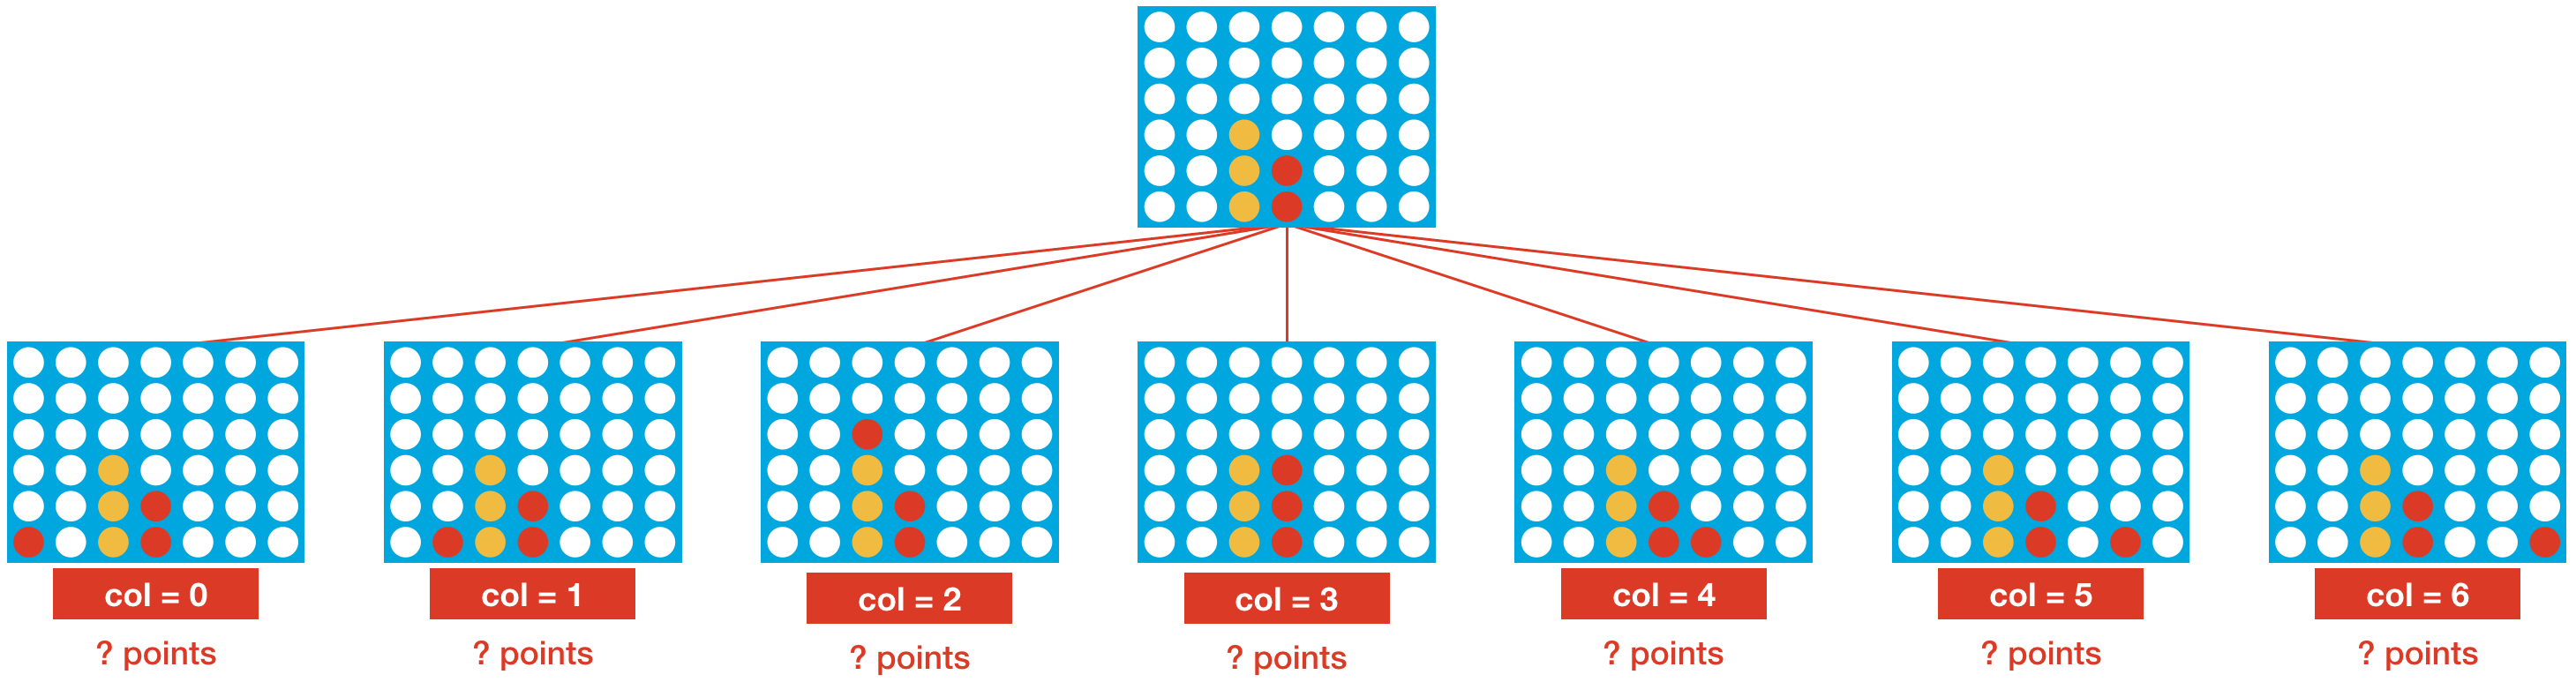

Then let's look at the question of evaluation in more detail. By default, victory is four cells in one line, it is on this option that we will stop for now, although we know that it is possible to make changes to the configuration of the virtual environment.
In total, all groups of four adjacent cells of the grid in one row, column or diagonal - this is a victory, our goal is to take the highest score of 1 million points.
But of course, before building a line from 4 cells, it must be built from 3 cells, and before that from 2 cells, respectively.
* 3 - cells will be evaluated at 1 point;
* 2 - cells will be estimated at 0.5 points;


Thus, we will reward our agent for getting such intermediate results. But what is no less important is to prevent the enemy from winning, and for such states that bring us closer to victory or victory, we must punish our agent. He must not allow the opponent to win. Accordingly, the good state of the enemy for us will mean a bad state and will be evaluated with a minus sign.
* 2 - cells will be estimated at minus 0.5 points;
* 3 - cells will be estimated at minus 100 points.


I suggested just such a system for assessing states, but you can set your own system by rewarding and punishing your agent with points.

In [ ]:
%%writefile step_lookahead_agent.py
# Importing Dependencies
import random  # connect the library for working with random numbers
import numpy as np  # connect the library general mathematical and numerical operations
'''
Helper Functions:
- score_move: calculates score if agent drops piece in selected column
- drop_piece: return grid status after player drops a piece
- get_heuristic: calculates value of heuristic for grid
- check_window: checks if window satisfies heuristic conditions
- count_windows: counts number of windows satisfying specified heuristic conditions
'''

# Calculates score if agent drops piece in selected column
def score_move(grid, col, mark, config):
    next_grid = drop_piece(grid, col, mark, config)  # board at next step
    score = get_heuristic(next_grid, mark, config)  # score in next step
    return score

# Gets board at next step if agent drops piece in selected column
def drop_piece(grid, col, mark, config):  # 
    next_grid = grid.copy()  # make a copy of the location of the chips on the playing field for its further transformation
    for row in range(config.rows-1, -1, -1):  # iterate over all rows in the playing field
        if next_grid[row][col] == 0:  # we are not interested in empty cells
            break  # we skip them if we meet such
    next_grid[row][col] = mark # mark the cell in which our chip will fall
    return next_grid # return board at next step

# calculates value of heuristic for grid
def get_heuristic(grid, mark, config):
    # coefficients of the positions    
    A = 1e6  # if the agent has four disks in a row (the agent won), he gets  1 000 000 points
    B = 1  # if the agent has filled three spaces and the remaining space is empty (the agent wins on the next turn if he fills one more empty space)
    C = 0.5  # if your agent has filled two spaces and the remaining space is empty (your agent wins by filling the empty space after two more moves)
    D = -0.5  # if the opponent has filled two spaces and the remaining space is empty (the opponent wins by filling the empty space after two more moves)
    E = -1e2  # if the opponent has filled three spaces and the remaining space is empty (the opponent wins by filling the empty space)
    
    # calculation of all interconnections of the positions of friendly and enemy cells
    num_twos = count_windows(grid, 2, mark, config)  # if your agent has filled two spaces  
    num_threes = count_windows(grid, 3, mark, config)  # if the agent has filled three spaces
    num_fours = count_windows(grid, 4, mark, config)  # if the agent has four disks in a row (the agent won)
    num_twos_opp = count_windows(grid, 2, mark%2+1, config)  # if the opponent has filled two spaces 
    num_threes_opp = count_windows(grid, 3, mark%2+1, config)  # if the opponent has filled three spaces 
    
    '''after calculating all the interconnections of the positions of the cells of our own and the enemy, 
    we calculate the score of this board by applying the coefficients of the positions'''
    score = A*num_fours + B*num_threes + C*num_twos + D*num_twos_opp + E*num_threes_opp
    return score  # final score of this playing field position

# checks if window satisfies heuristic conditions
def check_window(window, num_discs, piece, config):
    return (window.count(piece) == num_discs and window.count(0) == config.inarow - num_discs)

# counts number of windows satisfying specified heuristic conditions
def count_windows(grid, num_discs, piece, config):
    num_windows = 0
    
    # horizontal
    for row in range(config.rows):  # iterate over all rows in the playing field
        for col in range(config.columns-(config.inarow-1)):  # iterate over all columns in the playing field
            window = list(grid[row, col:col + config.inarow])  # we form a list of all horozontal lines of chips (2, 3 or 4)
            if check_window(window, num_discs, piece, config):  # if it satisfies the line construction condition
                num_windows += 1  # increase the count of situations that satisfy the given condition
                
    # vertical
    for row in range(config.rows-(config.inarow-1)):  # iterate over all rows in the playing field
        for col in range(config.columns):  # iterate over all columns in the playing field
            window = list(grid[row:row + config.inarow, col])  # we form a list of all vertical lines of chips (2, 3 or 4)
            if check_window(window, num_discs, piece, config):  # if it satisfies the line construction condition
                num_windows += 1  # increase the count of situations that satisfy the given condition
                
    # positive diagonal
    for row in range(config.rows-(config.inarow-1)):  # iterate over all rows in the playing field
        for col in range(config.columns-(config.inarow-1)):  # iterate over all columns in the playing field
            window = list(grid[range(row, row + config.inarow), range(col, col+config.inarow)])  # we form a list of all pos. diagonal lines of chips (2, 3 or 4)
            if check_window(window, num_discs, piece, config):  # if it satisfies the line construction condition
                num_windows += 1  # increase the count of situations that satisfy the given condition
                
    # negative diagonal
    for row in range(config.inarow-1, config.rows):  # iterate over all rows in the playing field
        for col in range(config.columns-(config.inarow-1)):  # iterate over all columns in the playing field
            window = list(grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])  # we form a list of all neg. diagonal lines of chips (2, 3 or 4)
            if check_window(window, num_discs, piece, config):  # if it satisfies the line construction condition
                num_windows += 1  # increase the count of situations that satisfy the given condition
                
    return num_windows  # returns the number of possible wins for the given number of cells

# The agent is always implemented as a Python function that accepts two arguments: obs and config
def agent(obs, config):    
    valid_moves = [c for c in range(config.columns) if obs.board[c] == 0]  # Get list of valid moves    
    grid = np.asarray(obs.board).reshape(config.rows, config.columns)  # Convert the board to a 2D grid
    
    # Use the heuristic to assign a score to each possible board in the next turn
    scores = dict(zip(valid_moves, [score_move(grid, col, obs.mark, config) for col in valid_moves]))
    
    # Get a list of columns (moves) that maximize the heuristic
    max_cols = [key for key in scores.keys() if scores[key] == max(scores.values())]
    # Select at random from the maximizing columns
    return random.choice(max_cols)

In [ ]:
'''and now we will force a one step agent to play with the agent read from the file'''
env = make("connectx")

# Load an agent from a file
agent = "step_lookahead_agent.py"

agents = [agent, agent]  # here we will create a list of our agents
env.run(agents)  # specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

Great, now we see that everything is working and we can even submit this code to the contest and it will fight against the agents of other members of the Kaggle community. Of course, don't expect this agent to get a lot of points, of course he will be better than just throwing chips at random. Especially for you, I prepared an [example of this code](https://www.kaggle.com/andrej0marinchenko/03-one-step-lookahead-agent) in a separate notebook. Or immediately send the python file code from the [github](https://github.com/BEPb/Kaggle_step_by_step_ConnectX/tree/master/02.step_02) repository.

In [ ]:
%%time
agent1 = "initial_agent.py"
agent2 = "step_lookahead_agent.py"
get_win_percentages(agent1, agent2, n_rounds=100)

as we see our new agent who only looks ahead is much better than the initial agent who keeps making mistakes.

<a id="10"></a> <br>
# Nstep lookahead agent
Seeing one move is great, but it's even better to see further, predicting your opponent's moves.


In order to start this task, let's break it down into several smaller tasks.
1. Simulate all your possible moves, it's very simple, only 7 columns and possibly no more than 7 options for the next move;
2. Assess which of our moves will be the best;
3. Simulate all possible combinations of enemy moves after our move;
4. Assess what move will be best for him, for our agent it will be the worst.
5. Repeat all of the above N-times, depending on how far we want to look.
6. Name data about possible combinations of your moves and the opponent to choose the best combination for our agent.

If everything is clear and simple with modeling upcoming moves, you just need to try to throw chips into each column, we get such a state tree on each move.
And the more moves we try to predict, the more branched it becomes. Thus, for each of our moves, the enemy can make seven moves, after which, for each move of the enemy, we can again make our seven moves. Wow, that's already 7 possible combinations cubed 7 x 7 x 7 = 343, and that's just two moves ahead.
We got so many combinations then that we considered all possible moves, no matter if they benefit one or the other agent. And let's choose only the best for both agents, thereby narrowing the modeling options and the amount of information processed.



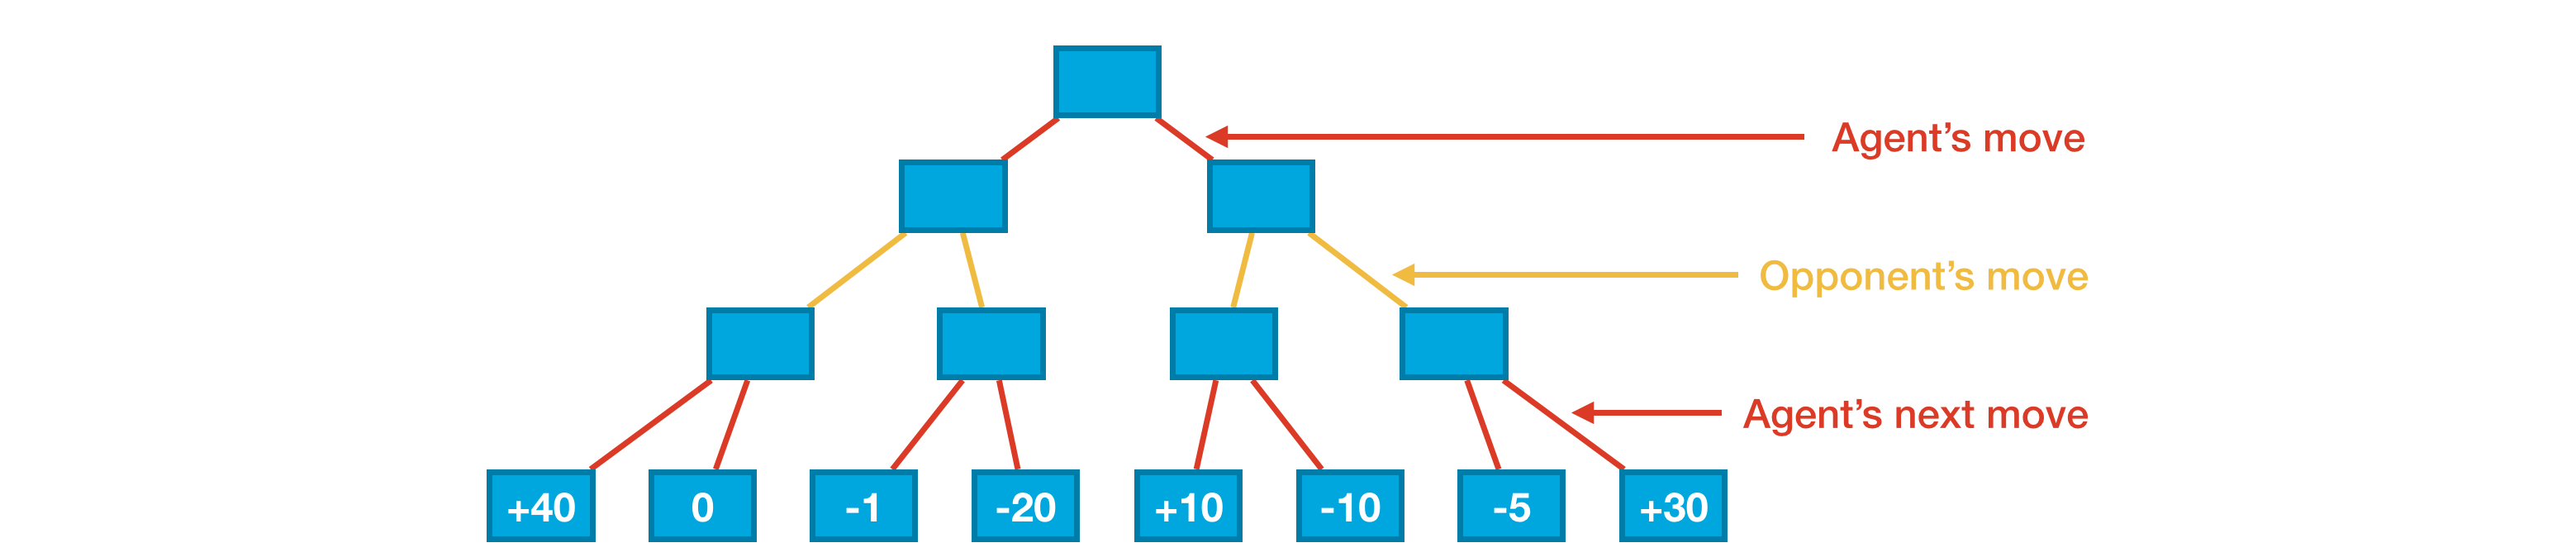


The agent chooses moves to get the highest score possible and assumes that the opponent will counteract this by choosing moves to get the score as low as possible. Such an algorithm is called minimax.



Then let's look at the question of evaluation in more detail. By default, victory is four cells in one line, it is on this option that we will stop for now, although we know that it is possible to make changes to the configuration of the virtual environment.
In total, all groups of four adjacent cells of the grid in one row, column or diagonal - this is a victory, our goal is to take the highest score of 1 million points.
But of course, before building a line from 4 cells, it must be built from 3 cells, and before that from 2 cells, respectively.
* 3 - cells will be evaluated at 1 point;
* 2 - cells will be estimated at 0.5 points;


Thus, we will reward our agent for getting such intermediate results. But what is no less important is to prevent the enemy from winning, and for such states that bring us closer to victory or victory, we must punish our agent. He must not allow the opponent to win. Accordingly, the good state of the enemy for us will mean a bad state and will be evaluated with a minus sign.
* 2 - cells will be estimated at minus 0.5 points;
* 3 - cells will be estimated at minus 100 points.


I suggested just such a system for assessing states, but you can set your own system by rewarding and punishing your agent with points.

In [ ]:
%%writefile Nstep_lookahead_agent.py
# Importing Dependencies
import random  # connect the library for working with random numbers
import numpy as np  # connect the library general mathematical and numerical operations
'''
Helper Functions:
- score_move: calculates score if agent drops piece in selected column
- drop_piece: return grid status after player drops a piece
- get_heuristic: calculates value of heuristic for grid
- check_window: checks if window satisfies heuristic conditions
- count_windows: counts number of windows satisfying specified heuristic conditions
- score_move: Uses minimax to calculate value of dropping piece in selected column
- minimax: Minimax implementation
- is_terminal_window: checks if agent or opponent has four in a row in the window
- is_terminal_node: checks if game has ended
'''

# Calculates score if agent drops piece in selected column
def score_move(grid, col, mark, config):
    next_grid = drop_piece(grid, col, mark, config)  # board at next step
    score = get_heuristic(next_grid, mark, config)  # score in next step
    return score

# Gets board at next step if agent drops piece in selected column
def drop_piece(grid, col, mark, config):  # 
    next_grid = grid.copy()  # make a copy of the location of the chips on the playing field for its further transformation
    for row in range(config.rows-1, -1, -1):  # iterate over all rows in the playing field
        if next_grid[row][col] == 0:  # we are not interested in empty cells
            break  # we skip them if we meet such
    next_grid[row][col] = mark # mark the cell in which our chip will fall
    return next_grid # return board at next step

# calculates value of heuristic for grid
def get_heuristic(grid, mark, config):
    # calculation of all interconnections of the positions of friendly and enemy cells
    num_threes = count_windows(grid, 3, mark, config)  # if the agent has filled three spaces
    num_fours = count_windows(grid, 4, mark, config)  # if the agent has four disks in a row (the agent won)
    num_threes_opp = count_windows(grid, 3, mark%2+1, config)  # if the opponent has filled three spaces 
    num_fours_opp = count_windows(grid, 4, mark%2+1, config)  # if the opponent has four disks in a row (the opponent won)
    
    '''after calculating all the interconnections of the positions of the cells of our own and the enemy, 
    we calculate the score of this board by applying the coefficients of the positions:    
    1 - if the agent has filled three spaces, he get +1 point
    -100 - if the opponent has filled three spaces,  we gets  -100 points 
    - 1e4 - if the opponent has four disks in a row (the opponent won), we gets  -10 000 points
    1e6 - if the agent has four disks in a row (the agent won), he gets  +1 000 000 points
    '''
    score = num_threes - 1e2*num_threes_opp - 1e4*num_fours_opp + 1e6*num_fours
    return score

# checks if window satisfies heuristic conditions
def check_window(window, num_discs, piece, config):
    return (window.count(piece) == num_discs and window.count(0) == config.inarow - num_discs)

# counts number of windows satisfying specified heuristic conditions
def count_windows(grid, num_discs, piece, config):
    num_windows = 0
    
    # horizontal
    for row in range(config.rows):  # iterate over all rows in the playing field
        for col in range(config.columns-(config.inarow-1)):  # iterate over all columns in the playing field
            window = list(grid[row, col:col + config.inarow])  # we form a list of all horozontal lines of chips (2, 3 or 4)
            if check_window(window, num_discs, piece, config):  # if it satisfies the line construction condition
                num_windows += 1  # increase the count of situations that satisfy the given condition
                
    # vertical
    for row in range(config.rows-(config.inarow-1)):  # iterate over all rows in the playing field
        for col in range(config.columns):  # iterate over all columns in the playing field
            window = list(grid[row:row + config.inarow, col])  # we form a list of all vertical lines of chips (2, 3 or 4)
            if check_window(window, num_discs, piece, config):  # if it satisfies the line construction condition
                num_windows += 1  # increase the count of situations that satisfy the given condition
                
    # positive diagonal
    for row in range(config.rows-(config.inarow-1)):  # iterate over all rows in the playing field
        for col in range(config.columns-(config.inarow-1)):  # iterate over all columns in the playing field
            window = list(grid[range(row, row + config.inarow), range(col, col+config.inarow)])  # we form a list of all pos. diagonal lines of chips (2, 3 or 4)
            if check_window(window, num_discs, piece, config):  # if it satisfies the line construction condition
                num_windows += 1  # increase the count of situations that satisfy the given condition
                
    # negative diagonal
    for row in range(config.inarow-1, config.rows):  # iterate over all rows in the playing field
        for col in range(config.columns-(config.inarow-1)):  # iterate over all columns in the playing field
            window = list(grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])  # we form a list of all neg. diagonal lines of chips (2, 3 or 4)
            if check_window(window, num_discs, piece, config):  # if it satisfies the line construction condition
                num_windows += 1  # increase the count of situations that satisfy the given condition
                
    return num_windows  # returns the number of possible wins for the given number of cells


#  Uses minimax to calculate value of dropping piece in selected column
def score_move(grid, col, mark, config, nsteps):
    next_grid = drop_piece(grid, col, mark, config)
    score = minimax(next_grid, nsteps-1, False, mark, config)
    return score

# Helper function for minimax: checks if agent or opponent has four in a row in the window
def is_terminal_window(window, config):
    return window.count(1) == config.inarow or window.count(2) == config.inarow

# Helper function for minimax: checks if game has ended
def is_terminal_node(grid, config):
    # Check for draw 
    if list(grid[0, :]).count(0) == 0:
        return True
    # Check for win: horizontal, vertical, or diagonal
    
    # horizontal 
    for row in range(config.rows):
        for col in range(config.columns-(config.inarow-1)):
            window = list(grid[row, col:col+config.inarow])
            if is_terminal_window(window, config):
                return True
    # vertical
    for row in range(config.rows-(config.inarow-1)):
        for col in range(config.columns):
            window = list(grid[row:row+config.inarow, col])
            if is_terminal_window(window, config):
                return True
    # positive diagonal
    for row in range(config.rows-(config.inarow-1)):
        for col in range(config.columns-(config.inarow-1)):
            window = list(grid[range(row, row+config.inarow), range(col, col+config.inarow)])
            if is_terminal_window(window, config):
                return True
    # negative diagonal
    for row in range(config.inarow-1, config.rows):
        for col in range(config.columns-(config.inarow-1)):
            window = list(grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])
            if is_terminal_window(window, config):
                return True
    return False

# Minimax implementation
def minimax(node, depth, maximizingPlayer, mark, config):
    is_terminal = is_terminal_node(node, config)
    valid_moves = [c for c in range(config.columns) if node[0][c] == 0]
    if depth == 0 or is_terminal:
        return get_heuristic(node, mark, config)
    if maximizingPlayer:
        value = -np.Inf
        for col in valid_moves:
            child = drop_piece(node, col, mark, config)
            value = max(value, minimax(child, depth-1, False, mark, config))
        return value
    else:
        value = np.Inf
        for col in valid_moves:
            child = drop_piece(node, col, mark%2+1, config)
            value = min(value, minimax(child, depth-1, True, mark, config))
        return value
    

# How deep to make the game tree: higher values take longer to run!
N_STEPS = 3

def agent(obs, config):
    # Get list of valid moves
    valid_moves = [c for c in range(config.columns) if obs.board[c] == 0]
    # Convert the board to a 2D grid
    grid = np.asarray(obs.board).reshape(config.rows, config.columns)
    # Use the heuristic to assign a score to each possible board in the next step
    scores = dict(zip(valid_moves, [score_move(grid, col, obs.mark, config, N_STEPS) for col in valid_moves]))
    # Get a list of columns (moves) that maximize the heuristic
    max_cols = [key for key in scores.keys() if scores[key] == max(scores.values())]
    # Select at random from the maximizing columns
    return random.choice(max_cols)

In [ ]:
'''and now we will force a n step agent to play with the agent read from the file'''
env = make("connectx")

# Load an agent from a file
agent = "Nstep_lookahead_agent.py"

agents = [agent, agent]  # here we will create a list of our agents
env.run(agents)  # specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

Great, now we see that everything is working and we can even submit this code to the contest and it will fight against the agents of other members of the Kaggle community. Of course, don't expect this agent to get a lot of points, of course he will be better than just throwing chips at random. Especially for you, I prepared an [example of this code](https://www.kaggle.com/andrej0marinchenko/04-nstep-lookahead-agent) in a separate notebook. Or immediately send the python file code from the [github](https://github.com/BEPb/Kaggle_step_by_step_ConnectX/tree/master/02.step_02) repository.

In [ ]:
%%time
agent1 = "Nstep_lookahead_agent.py"
agent2 = "step_lookahead_agent.py"
get_win_percentages(agent1, agent2, n_rounds=100)

<a id="11"></a> <br>
# Fast N-step lookahead agent

### Understanding computational complexity when running a game simulation:


Here we have considered a board size of 6 by 7, and 4 pieces of cells that need to be combined to win one of the agents.

The agent program, when predicting just one move, each time goes through all the possible options by throwing a chip into each of the 7 columns, just one move makes it start the function of transforming the playing field with a size of 7 columns by 6 rows and analyzing it for the presence of connected 2, 3 or 4 cells , after which it calculates the points. On the next move, we multiply all our calculations by 7, and so on and so forth exponentially.

### How can we simplify our calculations:

Instead of calculating the value over the entire grid, we can simply calculate the change in the value of the windows containing the position at which the piece was thrown. This will reduce the number of windows and the computational complexity.

In [ ]:
%%writefile fast_Nstep_lookahead_agent.py
# Importing Dependencies
import random  # connect the library for working with random numbers
import numpy as np  # connect the library general mathematical and numerical operations
'''
Helper Functions:
- score_move_a: calculates score if agent drops piece in selected column
- score_move_b: calculates score if opponent drops piece in selected column
- drop_piece: return grid status after player drops a piece
- get_heuristic: calculates value of heuristic for grid
- get_heuristic_optimised: calculates value of heuristic optimised
- check_window: checks if window satisfies heuristic conditions
- count_windows: counts number of windows satisfying specified heuristic conditions
- count_windows_optimised: counts number of windows satisfying specified heuristic optimised conditions
'''

# Calculates score if agent drops piece in selected column
def score_move_a(grid, col, mark, config, start_score, n_steps):
    next_grid, pos = drop_piece(grid, col, mark, config)
    row, col = pos
    score = get_heuristic_optimised(grid,next_grid,mark,config, row, col,start_score)
    valid_moves = [col for col in range (config.columns) if next_grid[0][col]==0]
    '''Since we have just dropped our piece there is only the possibility of us getting 4 in a row and not the opponent.
    Thus score can only be +infinity'''
    scores = []
    if len(valid_moves)==0 or n_steps ==0 or score == float("inf"):
        return score
    else :
        for col in valid_moves:
            current = score_move_b(next_grid,col,mark,config,score,n_steps-1)
            scores.append(current)
        score = min(scores)
    return score

# calculates score if opponent drops piece in selected column
def score_move_b(grid, col, mark, config, start_score, n_steps):
    next_grid, pos = drop_piece(grid,col,(mark%2)+1,config)
    row, col = pos
    score = get_heuristic_optimised(grid,next_grid,mark,config, row, col,start_score)
    valid_moves = [col for col in range (config.columns) if next_grid[0][col]==0]
    '''
    Since we have just dropped opponent piece there is only the possibility of opponent getting 4 in a row and not us.
    Thus score can only be -infinity.
    '''
    scores = []
    if len(valid_moves)==0 or n_steps ==0 or score == float ("-inf"):
        return score
    else :
        for col in valid_moves:
            current = score_move_a (next_grid,col,mark,config,score,n_steps-1)
            scores.append(current)
        score = max(scores)
    return score

# Gets board at next step if agent drops piece in selected column
def drop_piece(grid, col, mark, config):  # 
    next_grid = grid.copy()  # make a copy of the location of the chips on the playing field for its further transformation
    for row in range(config.rows-1, -1, -1):  # iterate over all rows in the playing field
        if next_grid[row][col] == 0:  # we are not interested in empty cells
            break  # we skip them if we meet such
    next_grid[row][col] = mark # mark the cell in which our chip will fall
    return next_grid,(row,col) # return board at next step

# calculates value of heuristic for grid
def get_heuristic(grid, mark, config):
    score = 0
    num = count_windows(grid,mark,config)
    for i in range(config.inarow):
        #num  = count_windows (grid,i+1,mark,config)
        if (i==(config.inarow-1) and num[i+1] >= 1):
            return float("inf")
        score += (4**(i))*num[i+1]
    num_opp = count_windows (grid,mark%2+1,config)
    for i in range(config.inarow):
        if (i==(config.inarow-1) and num_opp[i+1] >= 1):
            return float ("-inf")
        score-= (2**((2*i)+1))*num_opp[i+1]
    return score

# calculates value of heuristic optimised
def get_heuristic_optimised(grid, next_grid, mark, config, row, col, start_score):
    score = 0
    num1 = count_windows_optimised(grid,mark,config,row,col)
    num2 = count_windows_optimised(next_grid,mark,config,row,col)
    for i in range(config.inarow):
        if (i==(config.inarow-1) and (num2[i+1]-num1[i+1]) >= 1):
            return float("inf")
        score += (4**(i))*(num2[i+1]-num1[i+1])
    num1_opp = count_windows_optimised(grid,mark%2+1,config,row,col)
    num2_opp = count_windows_optimised(next_grid,mark%2+1,config,row,col)
    for i in range(config.inarow): 
        if (i==(config.inarow-1) and num2_opp[i+1]-num1_opp[i+1]  >= 1):
            return float ("-inf")     
        score-= (2**((2*i)+1))*(num2_opp[i+1]-num1_opp[i+1])
    score+= start_score
    return score

# checks if window satisfies heuristic conditions
def check_window(window, piece, config):
    if window.count((piece%2)+1)==0:
        return window.count(piece)
    else:
        return -1

# counts number of windows satisfying specified heuristic conditions
def count_windows(grid, piece, config):
    num_windows = np.zeros(config.inarow+1)
    # horizontal
    for row in range(config.rows):
        for col in range(config.columns-(config.inarow-1)):
            window = list(grid[row, col:col+config.inarow])
            type_window = check_window(window, piece, config)
            if type_window != -1:
                num_windows[type_window] += 1
    # vertical
    for row in range(config.rows-(config.inarow-1)):
        for col in range(config.columns):
            window = list(grid[row:row+config.inarow, col])
            type_window = check_window(window, piece, config)
            if type_window != -1:
                num_windows[type_window] += 1
    # positive diagonal
    for row in range(config.rows-(config.inarow-1)):
        for col in range(config.columns-(config.inarow-1)):
            window = list(grid[range(row, row+config.inarow), range(col, col+config.inarow)])
            type_window = check_window(window, piece, config)
            if type_window != -1:
                num_windows[type_window] += 1
    # negative diagonal
    for row in range(config.inarow-1, config.rows):
        for col in range(config.columns-(config.inarow-1)):
            window = list(grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])
            type_window = check_window(window, piece, config)
            if type_window != -1:
                num_windows[type_window] += 1
    return num_windows

# counts number of windows satisfying specified heuristic optimised conditions
def count_windows_optimised(grid, piece, config, row, col):
    num_windows = np.zeros(config.inarow+1)
    # horizontal
    for acol in range(max(0,col-(config.inarow-1)),min(col+1,(config.columns-(config.inarow-1)))):
        window = list(grid[row, acol:acol+config.inarow])
        type_window = check_window(window, piece, config)
        if type_window != -1:
            num_windows[type_window] += 1
    # vertical
    for arow in range(max(0,row-(config.inarow-1)),min(row+1,(config.rows-(config.inarow-1)))):
        window = list(grid[arow:arow+config.inarow, col])
        type_window = check_window(window, piece, config)
        if type_window != -1:
            num_windows[type_window] += 1
    # positive diagonal
    for arow, acol in zip(range(row-(config.inarow-1),row+1),range(col-(config.inarow-1),col+1)):
        if (arow>=0 and acol>=0 and arow<=(config.rows-config.inarow) and acol<=(config.columns-config.inarow)):
            window = list(grid[range(arow, arow+config.inarow), range(acol, acol+config.inarow)])
            type_window = check_window(window, piece, config)
            if type_window != -1:
                num_windows[type_window] += 1
    # negative diagonal
    for arow,acol in zip(range(row,row+config.inarow),range(col,col-config.inarow,-1)):
        if (arow >= (config.inarow-1) and acol >=0 and arow <= (config.rows-1) and acol <= (config.columns-config.inarow)):
            window = list(grid[range(arow, arow-config.inarow, -1), range(acol, acol+config.inarow)])
            type_window = check_window(window, piece, config)
            if type_window != -1:
                num_windows[type_window] += 1
    return num_windows

# How deep to make the game tree: higher values take longer to run!
N_STEPS = 3
# main function of our agent
def agent(obs, config):
    grid = np.asarray(obs.board).reshape(config.rows, config.columns)
    valid_moves = [c for c in range(config.columns) if grid[0][c] == 0]
    scores = {}
    start_score = get_heuristic(grid, obs.mark, config)
    for col in valid_moves:
        scores[col] = score_move_a(grid, col, obs.mark, config,start_score, N_STEPS)
#     print (N_STEPS, "-step lookahead agent:",scores)
    max_cols = [key for key in scores.keys() if scores[key] == max(scores.values())]
    return random.choice(max_cols)

In [ ]:
'''and now we will force a fast n step agent to play with the agent read from the file'''
env = make("connectx")

# Load an agent from a file
agent = "fast_Nstep_lookahead_agent.py"

agents = [agent, agent]  # here we will create a list of our agents
env.run(agents)  # specify the list of agents from which you want to get actions. Returns tuple of lists the agent states of all steps executed
env.render(mode="ipython",width=500,height=500)  # for ease of display, select a screen size of 500 by 500 pixels

Great, now we see that everything is working and we can even submit this code to the contest and it will fight against the agents of other members of the Kaggle community. Of course, don't expect this agent to get a lot of points, of course he will be better than just throwing chips at random. Especially for you, I prepared an [example of this code](https://www.kaggle.com/andrej0marinchenko/05-fast-nstep-lookahead-agent) in a separate notebook. Or immediately send the python file code from the [github](https://github.com/BEPb/Kaggle_step_by_step_ConnectX/tree/master/02.step_02) repository.

In [ ]:
%%time
agent1 = "fast_Nstep_lookahead_agent.py"
agent2 = "step_lookahead_agent.py"
get_win_percentages(agent1, agent2, n_rounds=100)

In [ ]:
%%time
agent1 = "fast_Nstep_lookahead_agent.py"
agent2 = "Nstep_lookahead_agent.py"
get_win_percentages(agent1, agent2, n_rounds=100)

Wow, we not only created a faster version of the multi-way agent, but also a better one.

<a id="12"></a> <br>
# Create a submission file
The next code cell writes your agent to a Python file that can be submitted to the competition. Let's set the maximum value N_STEPS = 4 that satisfies the game condition, let me remind you that the time for a move is limited to 2 seconds.

In [ ]:
%%writefile submission.py
# fast_4step_lookahead_agent.py
# Importing Dependencies
import random  # connect the library for working with random numbers
import numpy as np  # connect the library general mathematical and numerical operations
'''
Helper Functions:
- score_move_a: calculates score if agent drops piece in selected column
- score_move_b: calculates score if opponent drops piece in selected column
- drop_piece: return grid status after player drops a piece
- get_heuristic: calculates value of heuristic for grid
- get_heuristic_optimised: calculates value of heuristic optimised
- check_window: checks if window satisfies heuristic conditions
- count_windows: counts number of windows satisfying specified heuristic conditions
- count_windows_optimised: counts number of windows satisfying specified heuristic optimised conditions
'''

# Calculates score if agent drops piece in selected column
def score_move_a(grid, col, mark, config, start_score, n_steps):
    next_grid, pos = drop_piece(grid, col, mark, config)
    row, col = pos
    score = get_heuristic_optimised(grid,next_grid,mark,config, row, col,start_score)
    valid_moves = [col for col in range (config.columns) if next_grid[0][col]==0]
    '''Since we have just dropped our piece there is only the possibility of us getting 4 in a row and not the opponent.
    Thus score can only be +infinity'''
    scores = []
    if len(valid_moves)==0 or n_steps ==0 or score == float("inf"):
        return score
    else :
        for col in valid_moves:
            current = score_move_b(next_grid,col,mark,config,score,n_steps-1)
            scores.append(current)
        score = min(scores)
    return score

# calculates score if opponent drops piece in selected column
def score_move_b(grid, col, mark, config, start_score, n_steps):
    next_grid, pos = drop_piece(grid,col,(mark%2)+1,config)
    row, col = pos
    score = get_heuristic_optimised(grid,next_grid,mark,config, row, col,start_score)
    valid_moves = [col for col in range (config.columns) if next_grid[0][col]==0]
    '''
    Since we have just dropped opponent piece there is only the possibility of opponent getting 4 in a row and not us.
    Thus score can only be -infinity.
    '''
    scores = []
    if len(valid_moves)==0 or n_steps ==0 or score == float ("-inf"):
        return score
    else :
        for col in valid_moves:
            current = score_move_a (next_grid,col,mark,config,score,n_steps-1)
            scores.append(current)
        score = max(scores)
    return score

# Gets board at next step if agent drops piece in selected column
def drop_piece(grid, col, mark, config):  # 
    next_grid = grid.copy()  # make a copy of the location of the chips on the playing field for its further transformation
    for row in range(config.rows-1, -1, -1):  # iterate over all rows in the playing field
        if next_grid[row][col] == 0:  # we are not interested in empty cells
            break  # we skip them if we meet such
    next_grid[row][col] = mark # mark the cell in which our chip will fall
    return next_grid,(row,col) # return board at next step

# calculates value of heuristic for grid
def get_heuristic(grid, mark, config):
    score = 0
    num = count_windows(grid,mark,config)
    for i in range(config.inarow):
        #num  = count_windows (grid,i+1,mark,config)
        if (i==(config.inarow-1) and num[i+1] >= 1):
            return float("inf")
        score += (4**(i))*num[i+1]
    num_opp = count_windows (grid,mark%2+1,config)
    for i in range(config.inarow):
        if (i==(config.inarow-1) and num_opp[i+1] >= 1):
            return float ("-inf")
        score-= (2**((2*i)+1))*num_opp[i+1]
    return score

# calculates value of heuristic optimised
def get_heuristic_optimised(grid, next_grid, mark, config, row, col, start_score):
    score = 0
    num1 = count_windows_optimised(grid,mark,config,row,col)
    num2 = count_windows_optimised(next_grid,mark,config,row,col)
    for i in range(config.inarow):
        if (i==(config.inarow-1) and (num2[i+1]-num1[i+1]) >= 1):
            return float("inf")
        score += (4**(i))*(num2[i+1]-num1[i+1])
    num1_opp = count_windows_optimised(grid,mark%2+1,config,row,col)
    num2_opp = count_windows_optimised(next_grid,mark%2+1,config,row,col)
    for i in range(config.inarow): 
        if (i==(config.inarow-1) and num2_opp[i+1]-num1_opp[i+1]  >= 1):
            return float ("-inf")     
        score-= (2**((2*i)+1))*(num2_opp[i+1]-num1_opp[i+1])
    score+= start_score
    return score

# checks if window satisfies heuristic conditions
def check_window(window, piece, config):
    if window.count((piece%2)+1)==0:
        return window.count(piece)
    else:
        return -1

# counts number of windows satisfying specified heuristic conditions
def count_windows(grid, piece, config):
    num_windows = np.zeros(config.inarow+1)
    # horizontal
    for row in range(config.rows):
        for col in range(config.columns-(config.inarow-1)):
            window = list(grid[row, col:col+config.inarow])
            type_window = check_window(window, piece, config)
            if type_window != -1:
                num_windows[type_window] += 1
    # vertical
    for row in range(config.rows-(config.inarow-1)):
        for col in range(config.columns):
            window = list(grid[row:row+config.inarow, col])
            type_window = check_window(window, piece, config)
            if type_window != -1:
                num_windows[type_window] += 1
    # positive diagonal
    for row in range(config.rows-(config.inarow-1)):
        for col in range(config.columns-(config.inarow-1)):
            window = list(grid[range(row, row+config.inarow), range(col, col+config.inarow)])
            type_window = check_window(window, piece, config)
            if type_window != -1:
                num_windows[type_window] += 1
    # negative diagonal
    for row in range(config.inarow-1, config.rows):
        for col in range(config.columns-(config.inarow-1)):
            window = list(grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])
            type_window = check_window(window, piece, config)
            if type_window != -1:
                num_windows[type_window] += 1
    return num_windows

# counts number of windows satisfying specified heuristic optimised conditions
def count_windows_optimised(grid, piece, config, row, col):
    num_windows = np.zeros(config.inarow+1)
    # horizontal
    for acol in range(max(0,col-(config.inarow-1)),min(col+1,(config.columns-(config.inarow-1)))):
        window = list(grid[row, acol:acol+config.inarow])
        type_window = check_window(window, piece, config)
        if type_window != -1:
            num_windows[type_window] += 1
    # vertical
    for arow in range(max(0,row-(config.inarow-1)),min(row+1,(config.rows-(config.inarow-1)))):
        window = list(grid[arow:arow+config.inarow, col])
        type_window = check_window(window, piece, config)
        if type_window != -1:
            num_windows[type_window] += 1
    # positive diagonal
    for arow, acol in zip(range(row-(config.inarow-1),row+1),range(col-(config.inarow-1),col+1)):
        if (arow>=0 and acol>=0 and arow<=(config.rows-config.inarow) and acol<=(config.columns-config.inarow)):
            window = list(grid[range(arow, arow+config.inarow), range(acol, acol+config.inarow)])
            type_window = check_window(window, piece, config)
            if type_window != -1:
                num_windows[type_window] += 1
    # negative diagonal
    for arow,acol in zip(range(row,row+config.inarow),range(col,col-config.inarow,-1)):
        if (arow >= (config.inarow-1) and acol >=0 and arow <= (config.rows-1) and acol <= (config.columns-config.inarow)):
            window = list(grid[range(arow, arow-config.inarow, -1), range(acol, acol+config.inarow)])
            type_window = check_window(window, piece, config)
            if type_window != -1:
                num_windows[type_window] += 1
    return num_windows

# How deep to make the game tree: higher values take longer to run!
N_STEPS = 4
# main function of our agent
def agent(obs, config):
    grid = np.asarray(obs.board).reshape(config.rows, config.columns)  # Convert the board to a 2D grid
    valid_moves = [c for c in range(config.columns) if grid[0][c] == 0]  # Get list of valid moves
    scores = {}
    start_score = get_heuristic(grid, obs.mark, config)
    for col in valid_moves:
        scores[col] = score_move_a(grid, col, obs.mark, config,start_score, N_STEPS)
#     print (N_STEPS, "-step lookahead agent:",scores)
    max_cols = [key for key in scores.keys() if scores[key] == max(scores.values())]  # Get a list of columns (moves) that maximize the heuristic
    return random.choice(max_cols)  # Select at random from the maximizing columns

<a id="13"></a> <br>
# Validate your submission file
The code cell below has the agent in your submission file play one game round against itself.

If it returns "Success!", then you have correctly defined your agent.

In [ ]:
'''let's conduct a final test of our agent, in which he will play against his copy. 
It is these tests that each agent submitted to the competition is subjected to, if he is capable, 
he will be able to play against his copy.
'''
saved_agent = 'submission.py'  # indicate that the agent is written in the file
env = make("connectx")  # create a virtual environment
env.run([saved_agent, saved_agent])  # play against your copy
print("Success!" if env.state[0].status == env.state[1].status == "DONE" else "Failed...")  # if the game was successful, then success
env.render(mode="ipython",width=500,height=500)  # and now let's see how our agent plays against himself

In [ ]:
end_time = time.time()
print("Notebook run time: {:.1f} seconds. Finished at {}".format(end_time - start_time, datetime.now()) )

<a id="14"></a> <br>
# Let's summarize our tutorial
We looked at how the basic models work and wrote our own, we tested each model on the game with our own copy, and also looked at how much better it plays than our previous agent.


| Number | Agent name | Points per leader board | Time 100 simulations | Win rate % | Losses % | Draws % | Link notebook kaggle | Link Github|
|---|---|---|---|---|---|---|---|---|
|1| random_agent | 210 | 709s | 50% | 50% | - | [link random agent](https://www.kaggle.com/andrej0marinchenko/00-simple-agent-random)| [link random agent](https://github.com/BEPb/Kaggle_step_by_step_ConnectX/blob/master/02.step_02/01.random.py)
|2| negamax_agent | 240 | 1 min 52s | 51% | 49% | - | [link negamax agent](https://www.kaggle.com/andrej0marinchenko/01-simple-agent-negamax)| [link negamax agent](https://github.com/BEPb/Kaggle_step_by_step_ConnectX/blob/master/02.step_02/02.negamax.py)
|3| initial_agent | 500 | 1min 40s | 87% | 5% | 8% | [link initial agent](https://www.kaggle.com/andrej0marinchenko/02-initial-agent)| [link initial agent](https://github.com/BEPb/Kaggle_step_by_step_ConnectX/blob/master/02.step_02/03.initital_agent.py)
|4| one_step_agent | 850 | 28s | 71% | 1% | 28% | [link one step agent](https://www.kaggle.com/andrej0marinchenko/03-one-step-lookahead-agent)| [link one step agent](https://github.com/BEPb/Kaggle_step_by_step_ConnectX/blob/master/02.step_02/04.step_lookahead_agent.py)
|5| N_step_agent (3 step) | 950 | 15min 23s | 52% | 46% | 2% | [link N step agent](https://www.kaggle.com/andrej0marinchenko/04-nstep-lookahead-agent)| [link N step agent](https://github.com/BEPb/Kaggle_step_by_step_ConnectX/blob/master/02.step_02/05.Nstep_lookahead_agent.pyy)
|4| Fast_N_step_agent (3 step)      | 1050 | 31min 06s | 93% | 3% | 4% | [link Fsat N step agent](https://www.kaggle.com/andrej0marinchenko/05-fast-nstep-lookahead-agent)| [link Fsat N step agent](https://github.com/BEPb/Kaggle_step_by_step_ConnectX/blob/master/02.step_02/06.fast_Nstep_lookahead_agent.py)

[Previous lesson](https://www.kaggle.com/andrej0marinchenko/000-intro-kaggle-environment) \\
[Next lesson](https://www.kaggle.com/andrej0marinchenko/002-q-learning-step-by-step-instruction)